<a href="https://colab.research.google.com/github/A-R-M-028/House-Price-Prediction-using-Linear-Regression/blob/main/Project_1_D37__House_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Multiple features dataset*

Dataset Link: https://drive.google.com/file/d/1yrVwfX1LjISQ6vdR1Kaht-S1_8y2Gk6z/view?usp=sharing

In [ ]:
import pandas as pd # Data Manipulation
import numpy as np # Numerical Python -> Mathematical operation
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
import re # Data Cleaning
from sklearn.linear_model import LinearRegression # Algorithm
from sklearn.preprocessing import LabelEncoder # Converting the categorical data into numerical data
from sklearn.metrics import r2_score # Accuracy Metric
from sklearn.model_selection import train_test_split # Spliting the dataset into training & testing dataset
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects/ML/Housing.csv")

# Problem Statement:
You have been given a dataset that describes the functionality of houses. Now, based on the given features, you have to build a model to predict the house price.


# EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.shape[0]

545

In [ ]:
df.shape[1]

13

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
len(df.columns)

13

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# ML can perform only on Numeric value not other so make it num
    5   mainroad          545 non-null    object
    6   guestroom         545 non-null    object
    7   basement          545 non-null    object
    8   hotwaterheating   545 non-null    object
    9   airconditioning   545 non-null    object
    11  prefarea          545 non-null    object
    12  furnishingstatus  545 non-null    object


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# Check for null value
df.isna().sum().sum() # No null value

0

<Axes: >

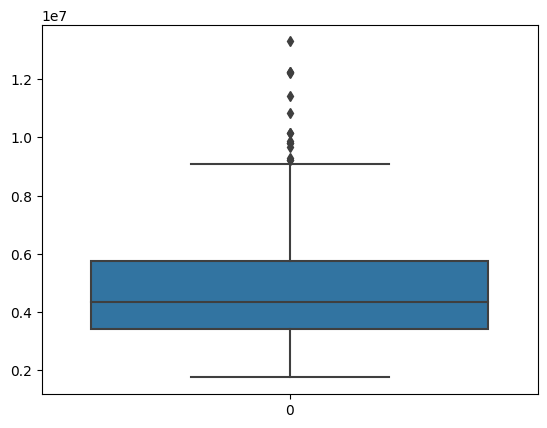

In [ ]:
# Check outliers (Box plot is the best option for that)
sns.boxplot(df.price)

In [ ]:
# IQR = Q3 - Q1

In [ ]:
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)

In [ ]:
IQR

2310000.0

In [ ]:
lower_bound = df.price.quantile(0.25) - 1.5*IQR
upper_bound = df.price.quantile(0.75) - 1.5* IQR

In [ ]:
lower_bound

-35000.0

In [ ]:
upper_bound

2275000.0

In [ ]:
# Ranges -> (-35000.0 -> 2275000.0) Outside this ranges all are outliers

In [ ]:
df.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [ ]:
# min    1.750000e+06
# min    17,50,000

*Min in this ranges*
*Now outliers in upper ranges, so find out that*

In [ ]:
df[df['price']>upper_bound]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2380000,2475,3,1,2,yes,no,no,no,no,0,no,furnished
523,2380000,2787,4,2,2,yes,no,no,no,no,0,no,furnished
524,2380000,3264,2,1,1,yes,no,no,no,no,0,no,unfurnished
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished


### *Steps to find outliers*
1. Plot Violin, box, scatter
2. IQR
3. U and L bound
4. Z test
5. Normalization

In [ ]:
len(df)

545

In [ ]:
545 - 527 # Outliers
# Is only 18 not outliers and and 545 are outliers?
# Absolutely not
# We are not satisfied with IQR so use different method

18

In [ ]:
# Before that convert categorical data into numerical data
# 5   mainroad
# 6   guestroom
# 7   basement
# 8   hotwaterheating
# 9   airconditioning
# 11  prefarea
# 12  furnishingstatus

In [ ]:
df['mainroad'].value_counts() # Or
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
# To convert yes -> 1
# To convert no -> 0
df.mainroad.replace(['yes', 'no'], [1, 0]) # But when large category? -> Use label encoder

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64

In [ ]:
newdf = df.copy()

In [ ]:
enc = LabelEncoder()

In [ ]:
enc.fit_transform(newdf.mainroad)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
newdf.mainroad

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [ ]:
# Here 1 is for yes
# Here 0 is for no

In [ ]:
newdf.mainroad = enc.fit_transform(newdf.mainroad)

In [ ]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [ ]:
newdf.mainroad.unique()

array([1, 0])

In [ ]:
newdf.basement.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
newdf.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
enc.fit_transform(df.basement)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
df.basement

0       no
1       no
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542     no
543     no
544     no
Name: basement, Length: 545, dtype: object

In [ ]:
# 0 ->no and 1 -> yes

In [ ]:
newdf.basement = enc.fit_transform(df.basement)

In [ ]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,1,no,yes,2,no,furnished


In [ ]:
# This repeats for rest of the category

In [ ]:
# 5   mainroad
# 6   guestroom
# 7   basement
# 8   hotwaterheating
# 9   airconditioning
# 11  prefarea
# 12  furnishingstatus

In [ ]:
df['mainroad'] = enc.fit_transform(df['mainroad'])
df['guestroom'] = enc.fit_transform(df['guestroom'])
df['basement'] = enc.fit_transform(df['basement'])
df['hotwaterheating'] = enc.fit_transform(df['hotwaterheating'])
df['airconditioning'] = enc.fit_transform(df['airconditioning'])
df['prefarea'] = enc.fit_transform(df['prefarea'])
df['furnishingstatus'] = enc.fit_transform(df['furnishingstatus'])

In [ ]:
# Now find out 0 mean and 1 mean here ? ->

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
df.furnishingstatus.unique()

array([0, 1, 2])

In [ ]:
newdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,0,no,no,0,no,furnished


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
# furnishingstatus  0 -> SemiFurnished, 1 -> Furnished, 2 Unfurnished->
# Always make a backup (A original copy must be there)

In [ ]:
# Data is ready and go for ML

In [ ]:
len(df)

545

In [ ]:
len(df.columns)

13

# Observation
1. Data Strength: 545
2. Total Number of Random Variables: 13
3. Non of the columns contained NULL values
4. Columns - Price, Area, Bedrooms, Bathrooms, Stories, Parking has numerical value
5. Columns - Mainrood, Guestroom, Basement, Hotwaterheating, Airconditioning, Prefarea, Furnishingstatus has object value and converted to numeric

In [ ]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

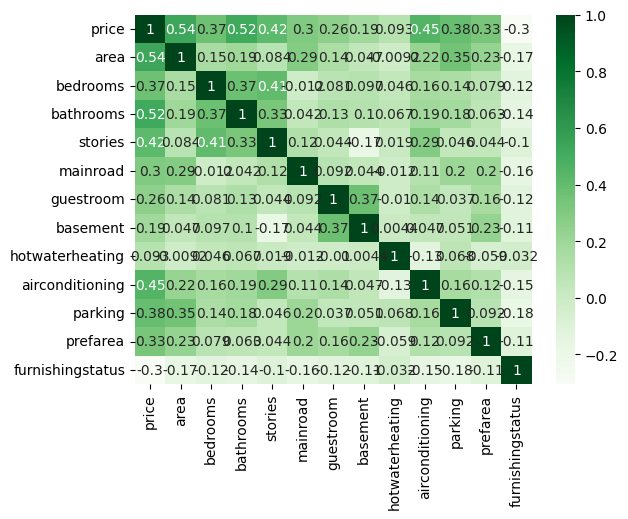

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

<Axes: >

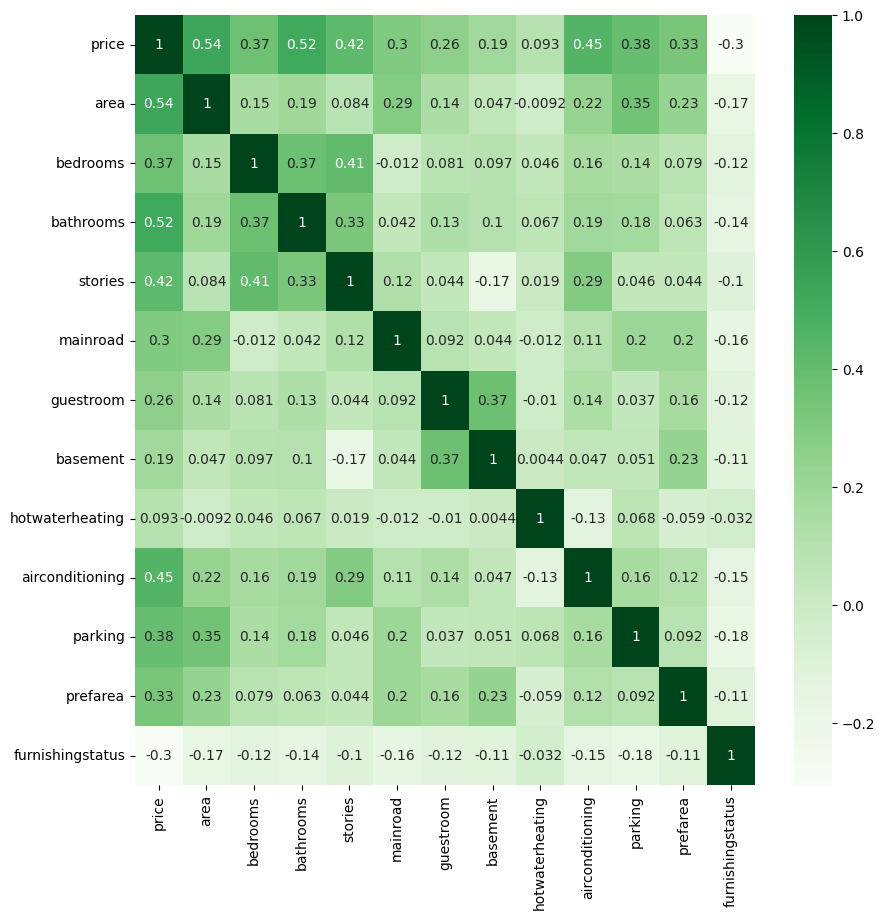

In [ ]:
plt.figure(figsize = (10, 10)) # In inches
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [ ]:
# Correlationis very less due to lutliers and it will effect prices

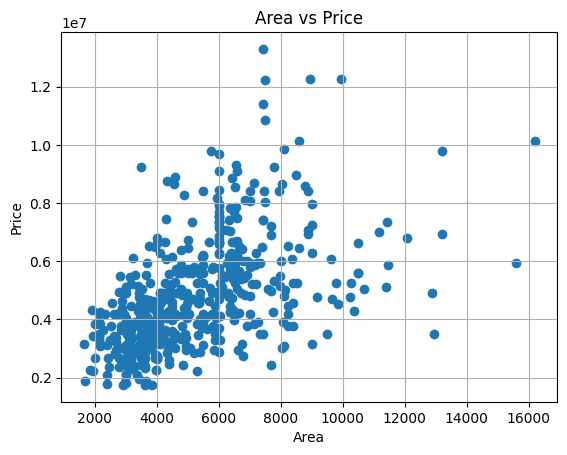

In [ ]:
# Plot to find relation between area and price of the house
# plt.scatter(df.price, df.area) -> No area is feature and price is target (x, y)
plt.scatter(df.area, df.price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.grid()

In [ ]:
# There are so many outliers

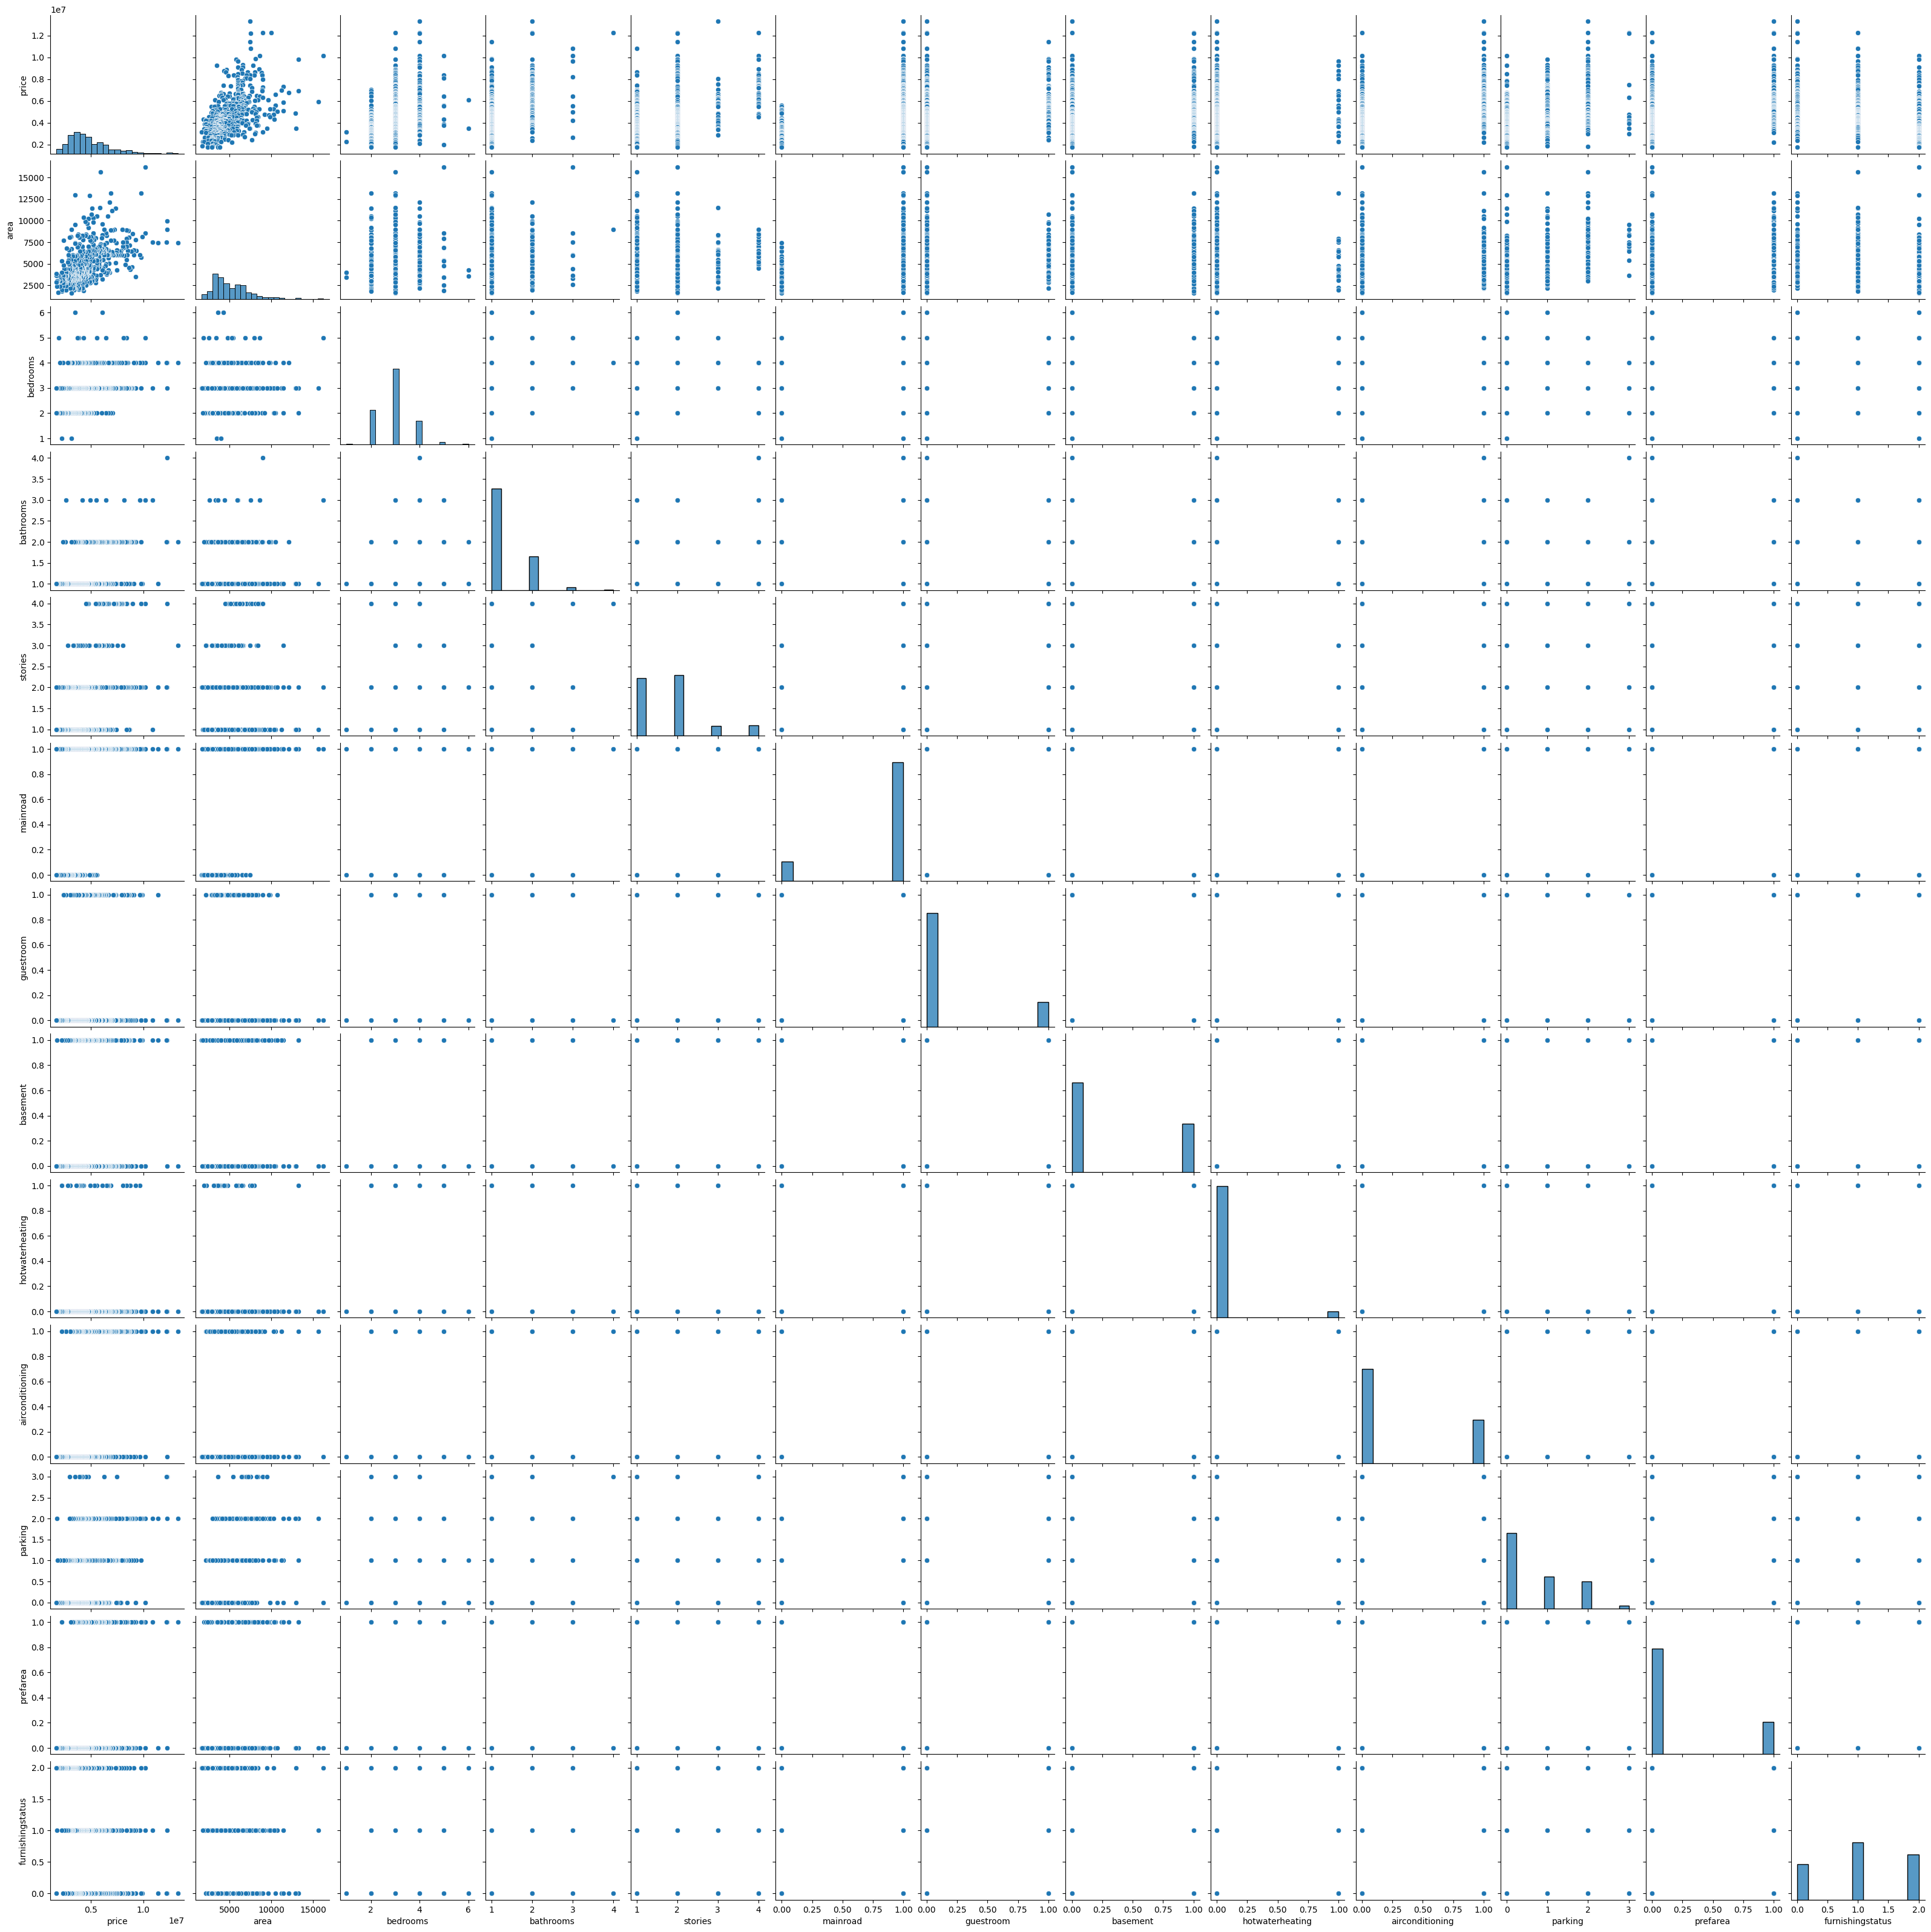

In [ ]:
# Now how to check scatter to find all the relationship
sns.pairplot(df)

<Axes: >

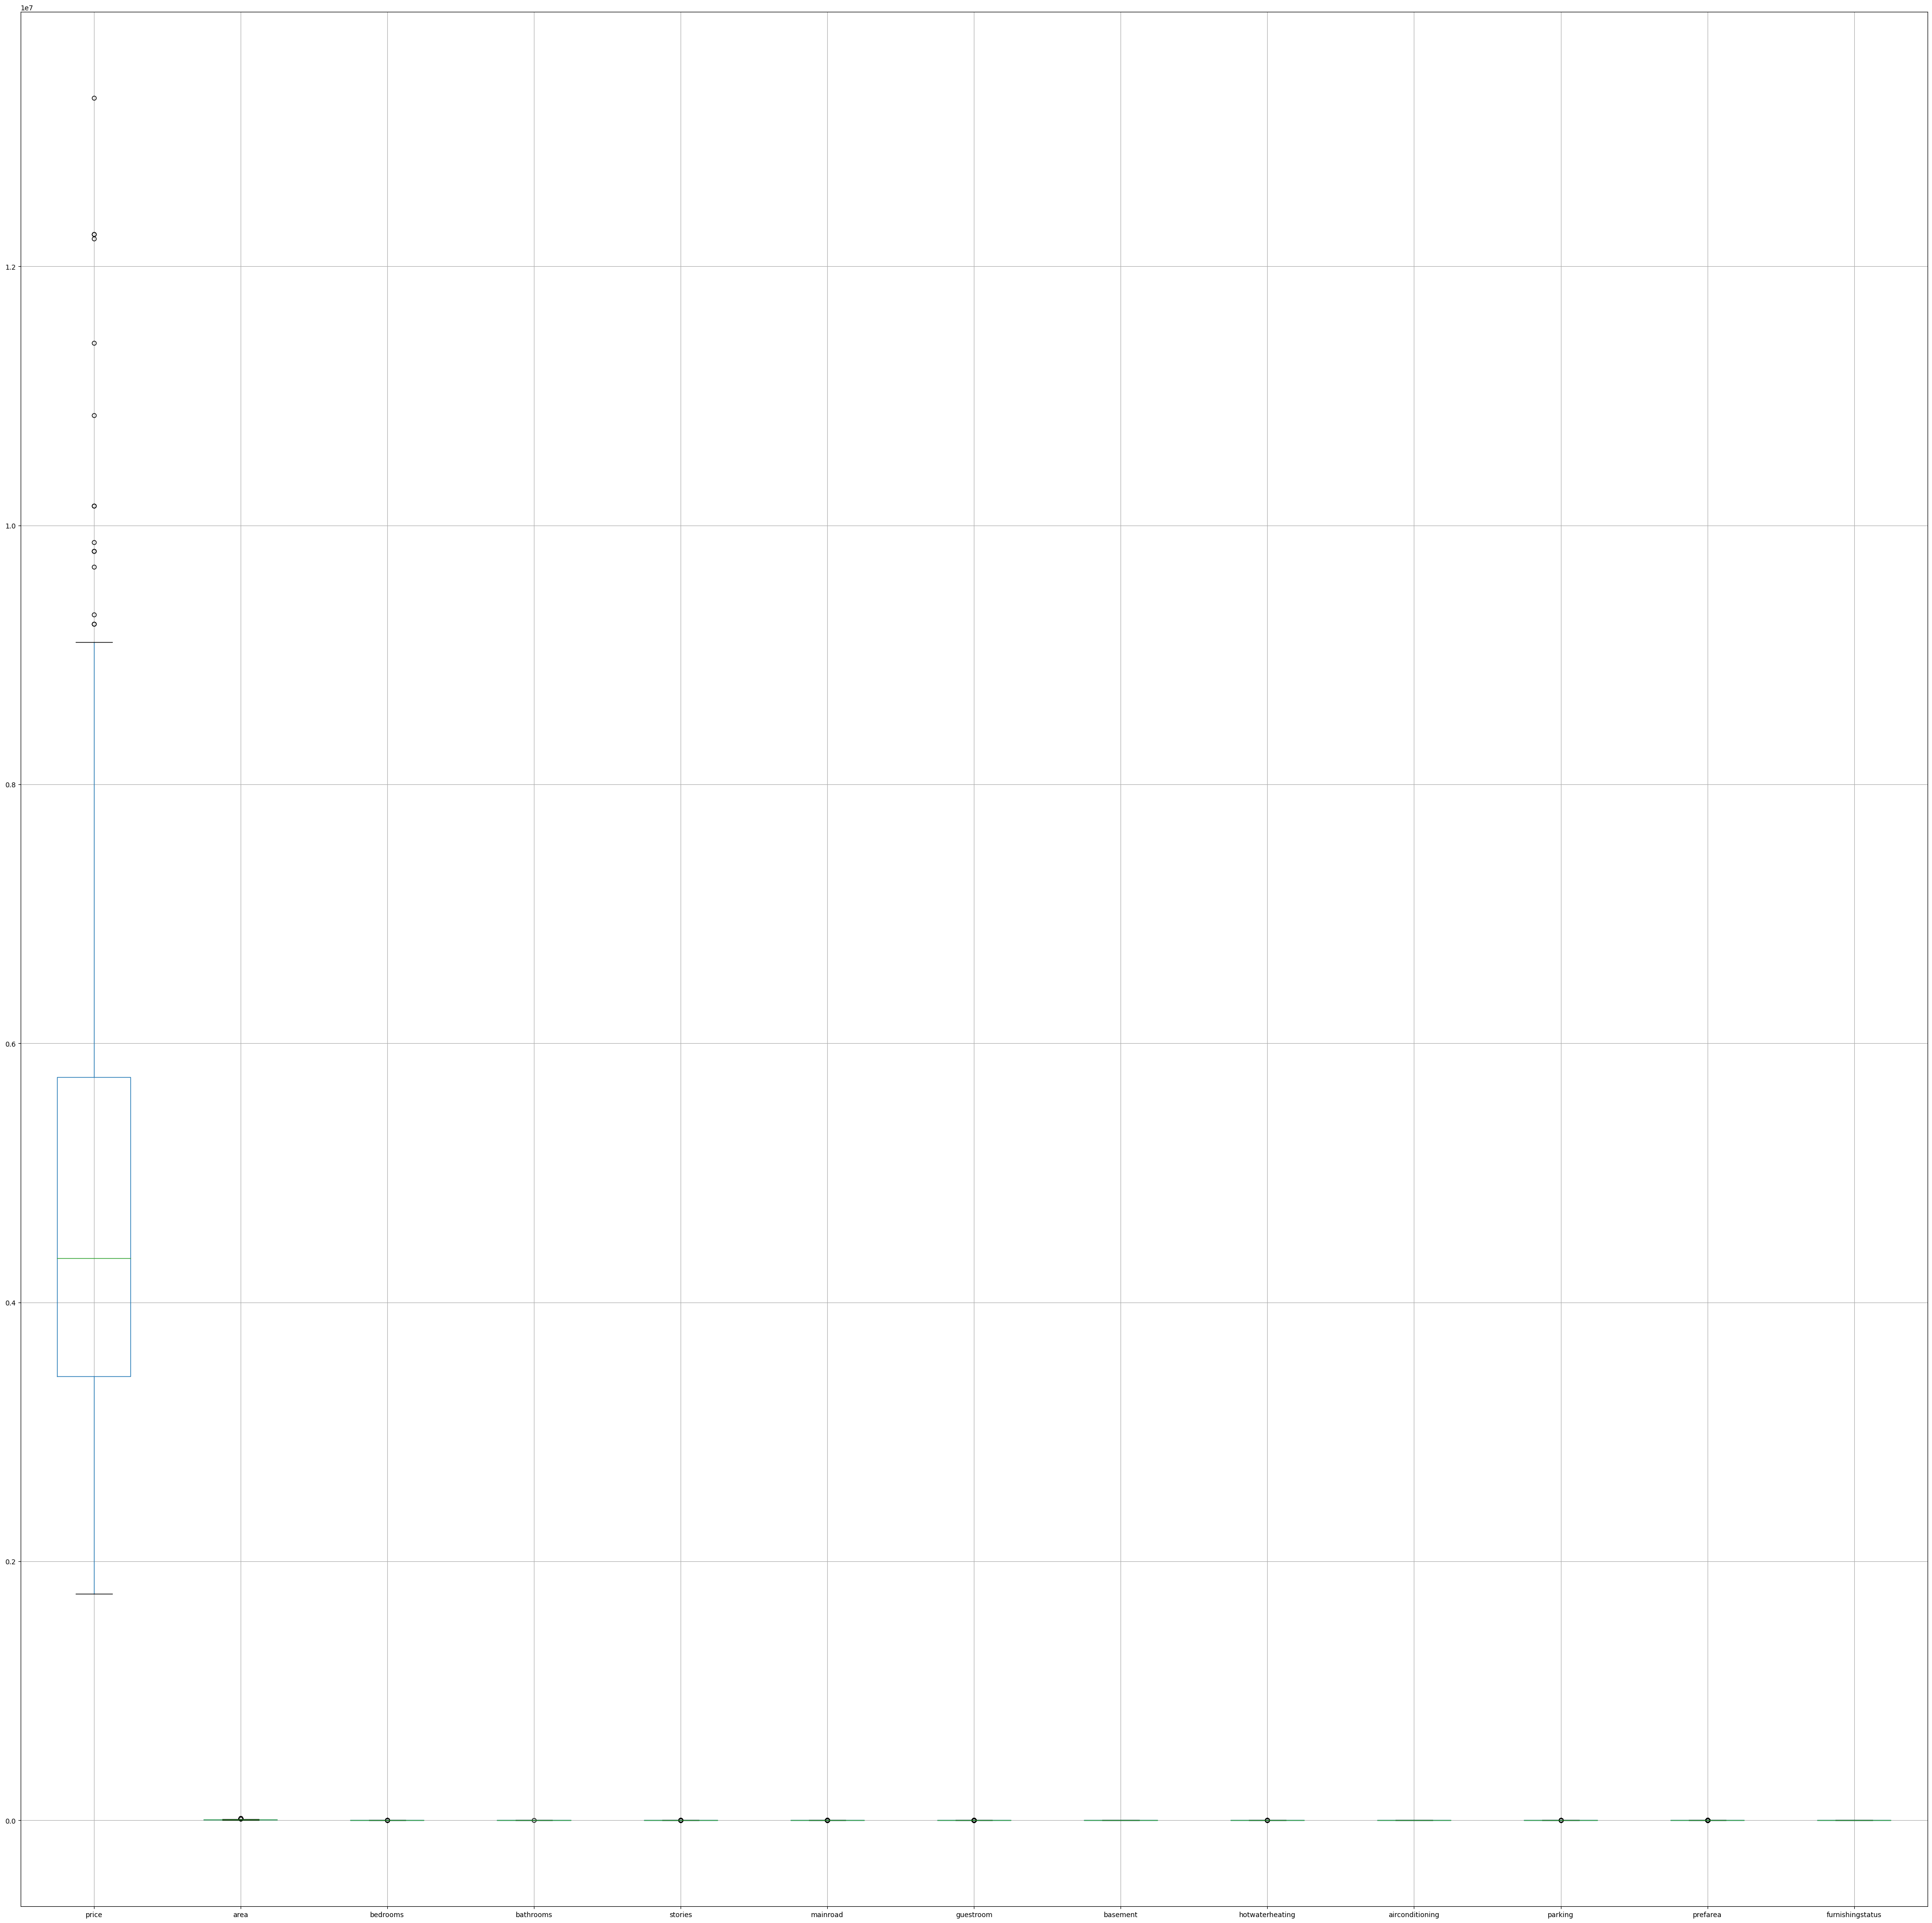

In [ ]:
# Box plot
plt.figure(figsize=(50, 50))
df.boxplot()

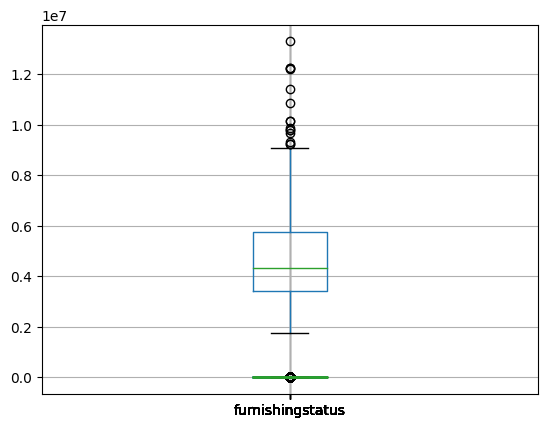

In [ ]:
for i in df.columns:
  df[[f'{i}']].boxplot()
  plt.plot()

In [ ]:
df.furnishingstatus.value_counts()

1    227
2    178
0    140
Name: furnishingstatus, dtype: int64

In [ ]:
# Since data is clean -> Go for the analysis

In [ ]:
# How many values are there where bedrooms more than 4

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
# value_counts() -> For unique value in the columns
df.bedrooms[df['bedrooms']>=4].count()

107

<Axes: >

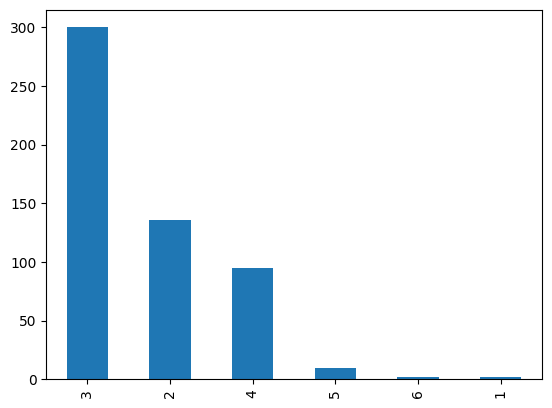

In [ ]:
# Bar plot for where how many values are there vvi
df.bedrooms.value_counts()
# Make sure know abt the values of -> 1, 2, 3, 4? Meaning
df.bedrooms.value_counts().plot.bar()

<Figure size 2000x2000 with 0 Axes>

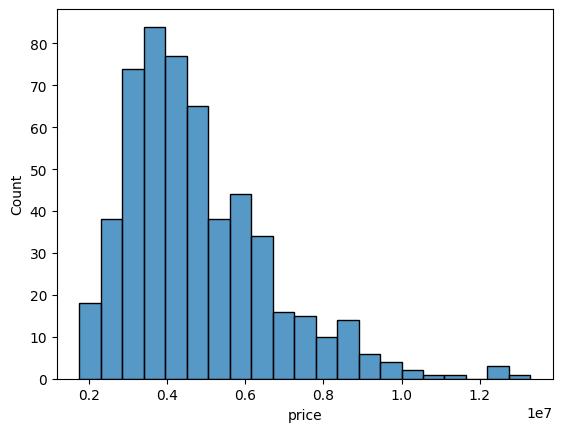

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# Histogram of prices -> Kind of distributions
sns.histplot(df.price)
# plt.figure(figsize = (20, 20)) -> Not work as it is the feature of matplotlib not for others

In [ ]:
# This hist falling under bell curve

In [ ]:
# Q: What is the price of house where bed rooms are 4 and bathrooms are 2 vvi
Columnns like -> Price     Bedroom     Bathroom

In [ ]:
df[['price', 'bedrooms', 'bathrooms']][(df.bedrooms == 4) & (df.bathrooms == 2)]

,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
len(df[['price', 'bedrooms', 'bathrooms']][(df.bedrooms == 4) & (df.bathrooms == 2)])

48

# Machine Learning

### Defining Model of the algorithm

In [ ]:
model = LinearRegression()

### Defining independent and dependent variable

In [ ]:
x = df.iloc[:,1:] # Select all the rows and select all col starting from 1 index
y = df.price

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
len(x_train)

436

In [ ]:
len(x_test)

109

### Training the model

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# m (Slope)
model.coef_ # For each of the column we getting coefficient (Slope or m)
# 1 extra col here as for the Target

array([ 2.35848772e+02,  7.85744924e+04,  1.09711727e+06,  4.06223164e+05,
        3.66824192e+05,  2.33146766e+05,  3.93159779e+05,  6.87881311e+05,
        7.85550579e+05,  2.25756514e+05,  6.29901661e+05, -2.10397118e+05])

In [ ]:
# c (Intercept)
model.intercept_ # This is (intercept or c)

293083.06915066857

In [ ]:
# y = c + m1x1 + m2x2 + m3x3 +.......mn*xn

### Testing / Prediction

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([5203691.70963178, 7257004.02115475, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.70489929, 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491253, 5788125.92515322,
       4768370.18154076, 4391684.04193171, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.1194117 , 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296896,
       3798185.05328059,

In [ ]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
newdf = pd.DataFrame({'Actual Value': y_test,
                      'Predicted Value': y_predict})

In [ ]:
newdf

,Actual Value,Predicted Value
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06
...,...,...
15,9100000,4.933137e+06
357,3773000,4.377133e+06
39,7910000,7.009335e+06
54,7350000,6.351461e+06


Text(0.5, 1.0, 'Actual Value vs Predicted Value')

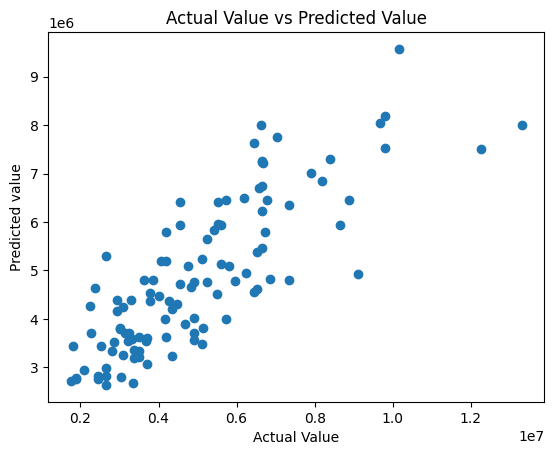

In [ ]:
plt.scatter(newdf['Actual Value'], newdf['Predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
plt.title('Actual Value vs Predicted Value')

In [ ]:
newdf.corr() # High Correlation

,Actual Value,Predicted Value
Actual Value,1.00000,0.81839
Predicted Value,0.81839,1.00000


<Axes: >

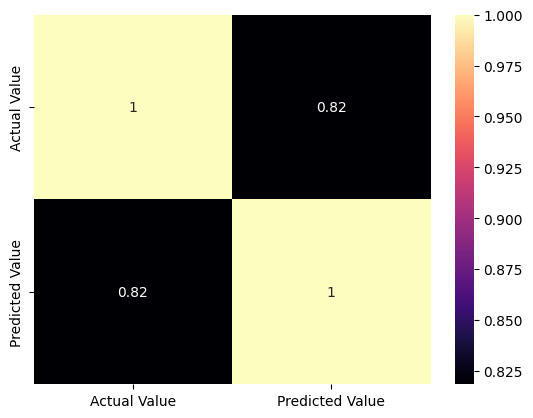

In [ ]:
sns.heatmap(newdf.corr(), annot=True, cmap='magma')

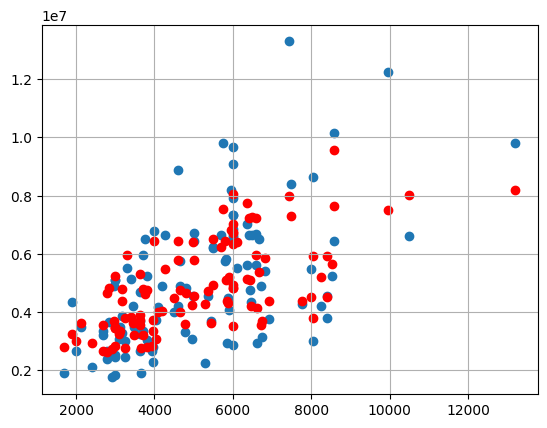

In [ ]:
plt.scatter(x_test.area, y_test)
plt.scatter(x_test.area, y_predict, color='r')
plt.grid()

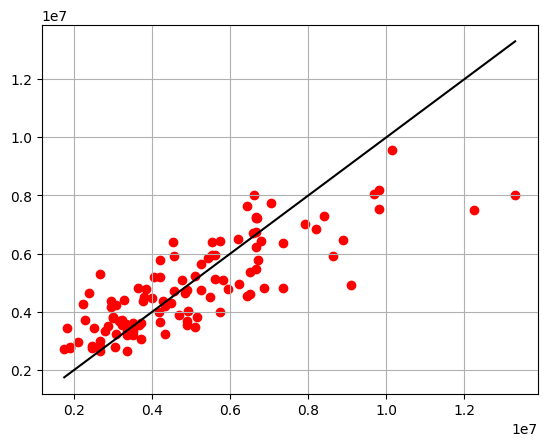

In [ ]:
plt.scatter(y_test, y_predict,c = 'r')
plt.plot(y, y, c = 'black')
plt.grid()

#Performance of the model

### Accuracy

In [ ]:
r2_score(y_test, y_predict)
# Accuracy is 65%

0.6494754192267803

In [ ]:
model.predict([[2400,2,2,2,2,2,2,1,1,1,1,1]]) # User input
# Besed on unser input price is -> 8127904.38773191

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8127904.38773191])

# Exporting the model

In [ ]:
with open('model.pkl', 'wb') as files:
  pickle.dump(model, files)

# Normalization

In [ ]:
def norm_fun(i):
  x = (i-i.min()) / (i.max() - i.min())
  return x;

In [ ]:
df_normalize = norm_fun(df.iloc[:, 1:])

In [ ]:
df_normalize # All values from 0 to 1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
df_normalize.describe() # Ranging from 0 to 1

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.534862
std,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

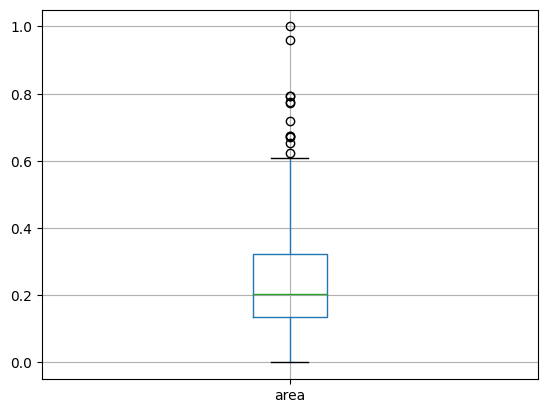

In [ ]:
df_normalize[['area']].boxplot() # To reduce outliers

In [ ]:
# Range 0.6 - 1.0

In [ ]:
# Different tuning also should perform to reduce outliers, here in normalization only formula not much here